In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
import os

In [7]:
savepath = ''

In [3]:
fieldIDlst = [1.42362112e+08, 1.38885662e+08, 9.54577280e+07, 1.77444450e+07,
       2.05649164e+08, 1.44133560e+08, 1.44024400e+08, 1.62324750e+08,
       3.94323040e+07, 1.27313418e+08, 1.27413603e+08, 4.10081480e+07,
       1.21332964e+08, 3.39235470e+07, 1.57449670e+07, 1.92562407e+08,
       1.85592680e+08, 8.68032400e+07, 7.19241000e+07]
fieldNamelst = ['Art', 'Philosophy', 'History', 'Political s.', 'Geography',
       'Business', 'Sociology', 'Economics', 'Environmental s.',
       'Geology', 'Engineering', 'Computer s.', 'Physics',
       'Mathematics', 'Psychology', 'Materials s.', 'Chemistry',
       'Biology', 'Medicine']
fieldDict = dict(zip(fieldIDlst,fieldNamelst))

# Processing data

In [4]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (FieldID)','Disruption_p']]
    df['Sample (FieldID)'] = df['Sample (FieldID)'].astype(float)
    return df

In [5]:
def get_coef(x):
    if '*' in x:
        x = x[:x.find('*')]
    elif '. ' in x:
        x = x[:x.find('. ')]
    else:
        x = x[:x.find(' ')]
    return float(x)
def get_ci(x):
    x = x[x.find('(')+1:x.find(')')]
    if x!='NA':
        return float(x)*1.96
    else:
        return 0
def get_star(x):
    if '***' in x:
        return '***'
    elif '**' in x:
        return '**'
    elif '*' in x:
        return '*'
    else:
        return ' '

In [6]:
path = ''

In [8]:
df11 = pd.read_csv(path + 'reg31.csv')
df12 = pd.read_csv(path + 'reg32.csv')
df13 = pd.read_csv(path + 'reg33.csv')
df14 = pd.read_csv(path + 'reg34.csv')

In [9]:
dflst = [df11,df12,df13,df14]

In [10]:
dflst2 = []
for d in dflst:
    d = get_df(d)
    d['coef1'] = d[d.columns[1]].apply(get_coef)
    d['star1'] = d[d.columns[1]].apply(get_star)
    d['ci1'] = d[d.columns[1]].apply(get_ci)
    d2 = pd.DataFrame({'Sample (FieldID)':fieldIDlst , 'FieldName':fieldNamelst})
    for co in d.columns[2:]:
        d2[co] = d2['Sample (FieldID)'].map(d.set_index('Sample (FieldID)')[co])
    dflst2.append(d2)

# Draw

In [11]:
colors = ["#C0392B","#1F618D","#AF601A","#117A65"]
labellst = ['P (Patents)','P(Clinical trials)','P (News)','P (Tweets)',]

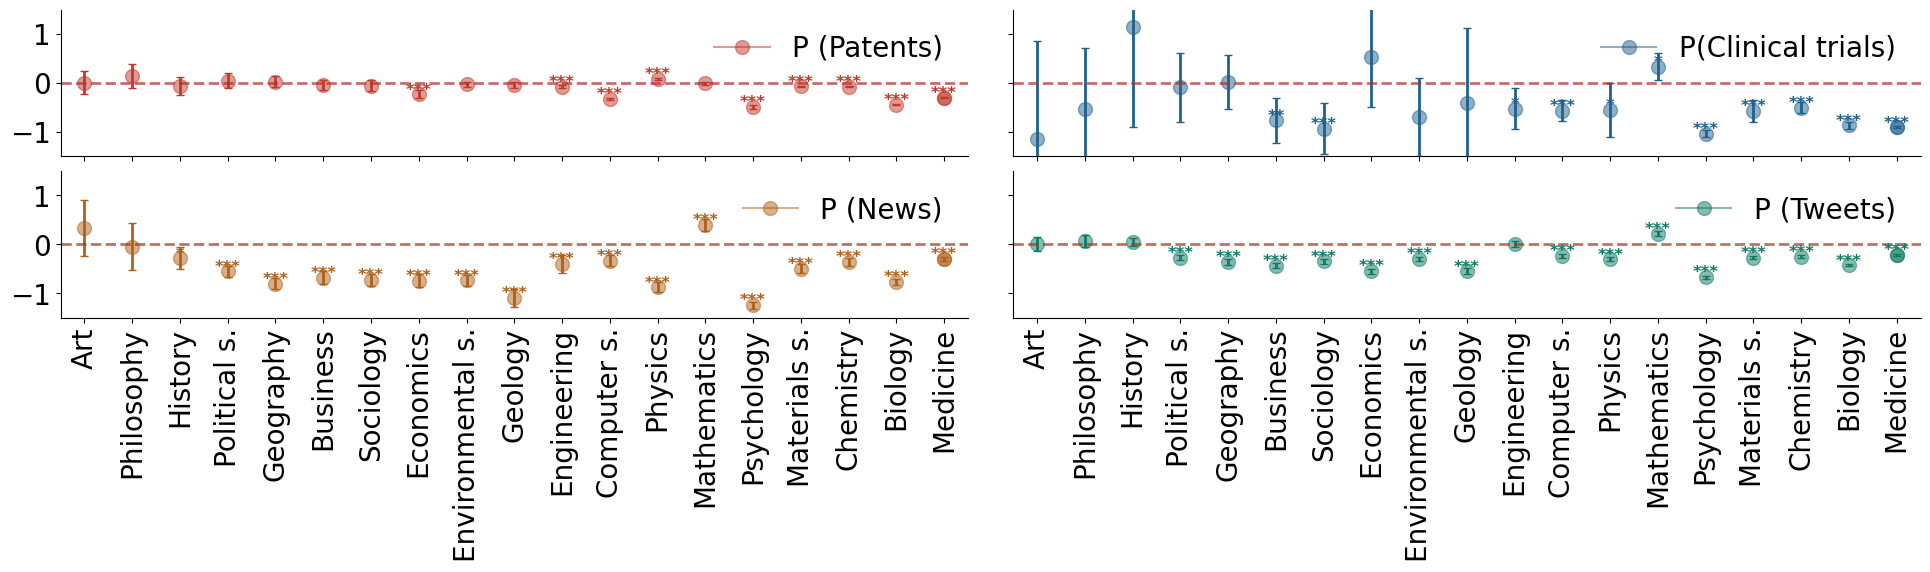

In [18]:
plt.subplots(2,2,figsize=(24,4),sharex = True,sharey = True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05,hspace=0.1)

for i in range(4):
    ax = plt.subplot(2,2,i+ 1)
    d = dflst2[i]
    for _ in range(len(d)):
        if d['coef1'].values[_]<=2:
            ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10)
            ax.errorbar(d.index[_],d['coef1'].values[_], yerr = d['ci1'].values[_] ,ecolor=colors[i], elinewidth=2 , capsize= 3 )
            ax.text(d.index[_],d['coef1'].values[_], d['star1'].values[_] ,color=colors[i], fontsize=12, ha='center', fontweight='bold')
    ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10,label = labellst[i])
    plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    plt.yticks(size = 20)
    plt.ylim(-1.5,1.5)
    plt.xlim(-0.5,18.5)
    plt.xticks(d.index,d['FieldName'].values,size = 20,rotation=90)
    plt.legend(fontsize = 20,frameon=False,loc='upper right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath + "c.svg",bbox_inches = 'tight')

# Draw2

In [19]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (FieldID)','log(NDC+1)']]
    df['Sample (FieldID)'] = df['Sample (FieldID)'].astype(float)
    return df

In [20]:
df11 = pd.read_csv(path + 'reg41.csv')
df12 = pd.read_csv(path + 'reg42.csv')
df13 = pd.read_csv(path + 'reg43.csv')
df14 = pd.read_csv(path + 'reg44.csv')

In [21]:
dflst = [df11,df12,df13,df14]

In [22]:
dflst2 = []
for d in dflst:
    d = get_df(d)
    d['coef1'] = d[d.columns[1]].apply(get_coef)
    d['star1'] = d[d.columns[1]].apply(get_star)
    d['ci1'] = d[d.columns[1]].apply(get_ci)
    d2 = pd.DataFrame({'Sample (FieldID)':fieldIDlst , 'FieldName':fieldNamelst})
    for co in d.columns[2:]:
        d2[co] = d2['Sample (FieldID)'].map(d.set_index('Sample (FieldID)')[co])
    dflst2.append(d2)

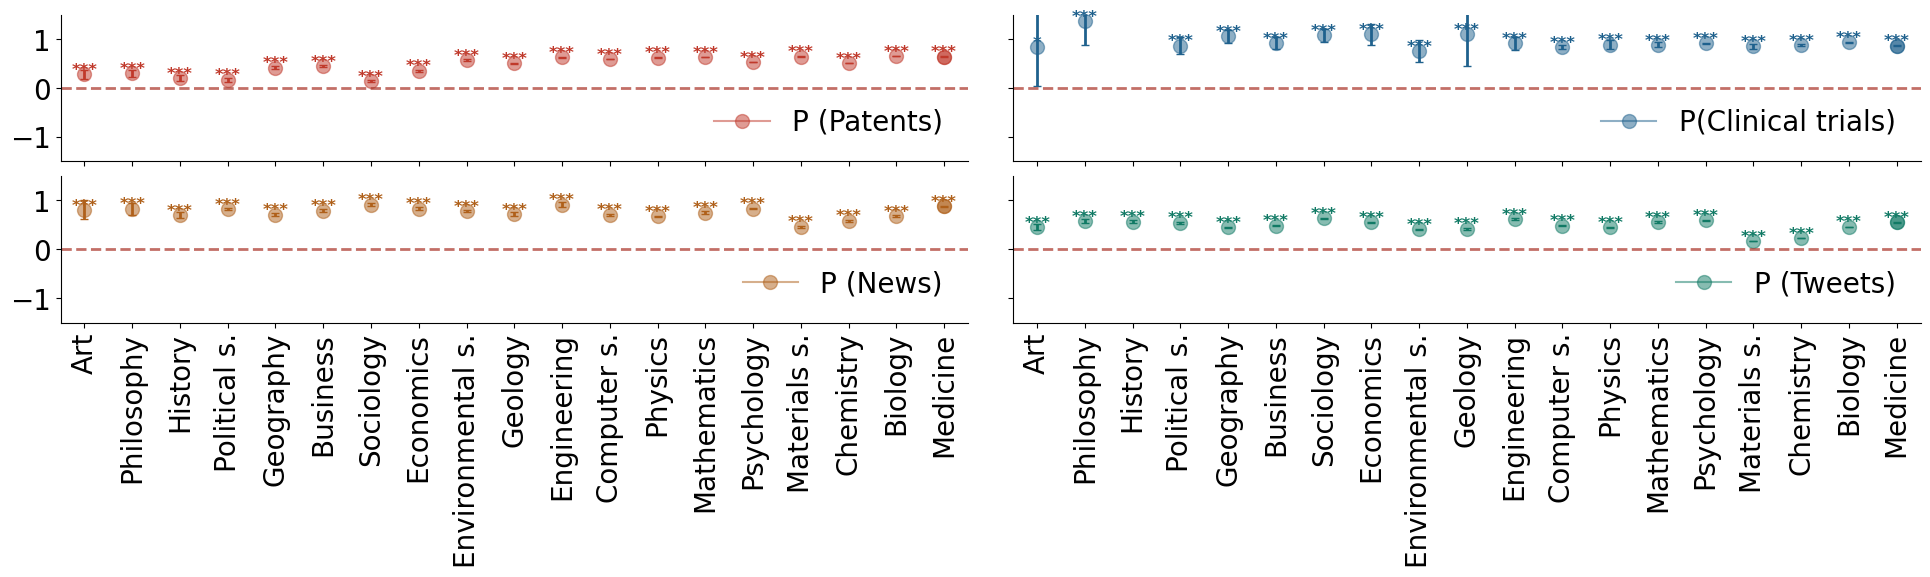

In [24]:
plt.subplots(2,2,figsize=(24,4),sharex = True,sharey = True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05,hspace=0.1)

for i in range(4):
    ax = plt.subplot(2,2,i+ 1)
    d = dflst2[i]
    for _ in range(len(d)):
        if d['coef1'].values[_]<=2:
            ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10)
            ax.errorbar(d.index[_],d['coef1'].values[_], yerr = d['ci1'].values[_] ,ecolor=colors[i], elinewidth=2 , capsize= 3 )
            ax.text(d.index[_],d['coef1'].values[_], d['star1'].values[_] ,color=colors[i], fontsize=12, ha='center', fontweight='bold')
    ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10,label = labellst[i])
    plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    plt.yticks(size = 20)
    plt.ylim(-1.5,1.5)
    plt.xlim(-0.5,18.5)
    plt.xticks(d.index,d['FieldName'].values,size = 20,rotation=90)
    plt.legend(fontsize = 20,frameon=False,loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath + "d.svg",bbox_inches = 'tight')